# 决策树

## ID3

In [ ]:
from sklearn import tree 
import numpy as np

In [3]:
data = np.array([[1,1], [1, 0], [0,1], [0, 0]])

In [4]:
target = np.array([1, 1, 0, 0])

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

In [9]:
dat = tree.export_text(clf, feature_names=None)
dat

'|--- feature_0 <= 0.50\n|   |--- class: 0\n|--- feature_0 >  0.50\n|   |--- class: 1\n'

## CART分类决策树 - 鸢尾花数据集

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [14]:
# 准备数据
iris = load_iris()

In [16]:
# 获取特征集和分类标识
features = iris.data
labels = iris.target

In [17]:
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=0)

In [19]:
# 创建CART分类树做预测
clf = DecisionTreeClassifier(criterion='gini')

In [20]:
# 拟合构造的CART分类树
clf = clf.fit(train_features, train_labels)

In [22]:
# 用CART分类树做预测
test_predict = clf.predict(test_features)

In [24]:
# 预测集与结果集比较
score = accuracy_score(test_labels, test_predict)
print("CART分类树准确率 %.4lf" % score)

CART分类树准确率 0.9800


## CART分类决策树 - 手写数字数据集

In [3]:
from sklearn.datasets import load_digits

In [6]:
digit = load_digits()
features = digit.data
targets = digit.target
train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size=0.33, random_state=0)
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_features, train_labels)
test_predict = clf.predict(test_features)
score = accuracy_score(test_labels, test_predict)
score

0.8400673400673401

## CART回归决策树 - 波士顿房价数据集

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [26]:
# 准备数据
boston = load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [32]:
# 获取特征集和房价
features = boston.data
prices = boston.target
# 随机抽取33%的数据作为测试集，其余为训练集
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)
# 创建CART回归树
dtr = DecisionTreeRegressor()
# 拟合CART回归树
dtr.fit(train_features, train_price)
# 预测测试集中的房价
predict_price = dtr.predict(test_features)
# 测试集的结果评价
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price))

回归树二乘偏差均值: 36.916826347305395
回归树绝对值偏差均值: 3.4389221556886227


In [33]:
predict_price

array([45.4, 23.7, 23.7, 23.8, 15.6, 21.4, 24.4, 33.8, 23.5, 25. , 19.1,
       20.6, 29.1,  7.2, 19.5, 34.9, 36.2, 16.6, 21.9, 21.7, 34.6, 23.6,
       19.4, 11.7, 20.6, 37. , 21.2, 20.4, 23.5, 50. , 28.1, 20.1, 22.9,
       28.1, 20.4, 21.4, 18.5, 28.1, 19.9, 50. , 13.4, 22. , 26.4, 27.5,
       22. , 21.7, 21.1, 22.9, 22.5, 23.8, 21.9, 41.7, 23.5, 21.4, 11.7,
       21.9, 33.2, 35.1, 21.5, 48.8, 29.4, 10.9, 13.3, 20.7, 17.5, 23.6,
       23.5, 12.7, 13.3, 26.7, 16.6, 27.5, 17.7, 22.5, 17. , 22.8,  7.2,
       21.7, 16. , 33.8, 21.7, 21. , 15.2, 22.8, 21.1, 17.1, 12.7, 23.6,
       21.5, 23.9, 24.5, 12. , 22.6, 21.4, 29.4, 19.5, 15.2, 23.5, 16.8,
       17.8, 20.4, 20.8, 15.6, 19.1, 16.1, 50. ,  8.3, 25. , 24.6, 18.5,
       18.2, 44.8, 37.2, 18.4, 17.7,  7.2, 35.4, 14.6, 21. , 22.8, 12.3,
       21.7, 28. , 20. , 20.1, 34.9, 22. , 23.8, 24.2, 50. , 12.3, 28.1,
       17.5, 33.8, 19.5, 21. , 17.5, 22.6, 26.4, 34.6, 22.8, 18.4, 36.2,
       25. , 21.7, 24.7, 27.5, 21.4, 24.4, 11. ,  8

## 决策树 - Titanic 乘客生存预测

In [7]:
import pandas as pd

In [8]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [9]:
train.info()
train.describe()
train.describe(include=['O'])
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# 使用平均年龄来填充年龄中的nan值
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)

# 使用票价的均值填充票价中的nan值
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [41]:
# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train[features]
train_labels = train['Survived']
test_features = test[features]

In [42]:
# 处理字符串类型的离散变量
from sklearn.feature_extraction import DictVectorizer
dvec = DictVectorizer(sparse=False)
train_features = dvec.fit_transform(train_features.to_dict(orient = 'record'))

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2316/3240844735.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  train_features = dvec.fit_transform(train_features.to_dict(orient = 'record'))


In [44]:
from sklearn.tree import DecisionTreeClassifier
# 构造ID3决策树
clf = DecisionTreeClassifier(criterion='entropy')
# 决策树训练
clf.fit(train_features, train_labels)

DecisionTreeClassifier(criterion='entropy')

In [45]:
test_features=dvec.transform(test_features.to_dict(orient='record'))
# 决策树预测
pred_labels = clf.predict(test_features)

# 得到决策树准确率
acc_decision_tree = round(clf.score(train_features, train_labels), 6)
print(u'score准确率为 %.4lf' % acc_decision_tree)

score准确率为 0.9820


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_2316/418323904.py:1: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  test_features=dvec.transform(test_features.to_dict(orient='record'))


In [46]:
import numpy as np
from sklearn.model_selection import cross_val_score
# 使用K折交叉验证 统计决策树准确率
print('cross_val_score准确率为 %.4lf' % np.mean(cross_val_score(clf, train_features, train_labels, cv=10)))

cross_val_score准确率为 0.7801


# 朴素贝叶斯 - 文档分类

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

documents = [
    'this is the bayes document',
    'this is the second second document',
    'and the third one',
    'is this the document'
]

tfidf_matrix = tfidf_vec.fit_transform(documents)

print('不重复的词:', tfidf_vec.get_feature_names())
print('每个单词的ID：', tfidf_vec.vocabulary_)
print('每个单词的tfidf值', tfidf_matrix.toarray())

不重复的词: ['and', 'bayes', 'document', 'is', 'one', 'second', 'the', 'third', 'this']
每个单词的ID： {'this': 8, 'is': 3, 'the': 6, 'bayes': 1, 'document': 2, 'second': 5, 'and': 0, 'third': 7, 'one': 4}
每个单词的tfidf值 [[0.         0.63314609 0.40412895 0.40412895 0.         0.
  0.33040189 0.         0.40412895]
 [0.         0.         0.27230147 0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.         0.52210862 0.52210862 0.         0.
  0.42685801 0.         0.52210862]]


In [18]:
# 中文文档分类
import os 
import jieba
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB 

warnings.filterwarnings('ignore')

In [6]:
def cut_words(file_path):
    """对文件进行分词"""
    text_with_space = ''
    text = open(file_path, 'r', encoding='gb18030').read()
    text_cut = jieba.cut(text)
    for word in text_cut:
        text_with_space += word + ' '
    return text_with_space

def load_file(file_dir, lable):
    """将路径下所有文件加载"""
    file_list = os.listdir(file_dir)
    words_list = []
    labless_list = []
    for file in file_list:
        file_path = file_dir + '/' + file
        words_list.append(cut_words(file_path))
        lables_list.append(lable)
    return words_list, lables_list

In [11]:
# 训练数据
train_words_list1, train_labels1 = load_file('./text_classification-master/text classification/train/女性', '女性')
train_words_list2, train_labels2 = load_file('./text_classification-master/text classification/train/体育', '体育')
train_words_list3, train_labels3 = load_file('./text_classification-master/text classification/train/文学', '文学')
train_words_list4, train_labels4 = load_file('./text_classification-master/text classification/train/校园', '校园')

train_words_list = train_words_list1 + train_words_list2 + train_words_list3 + train_words_list4
train_labels = train_labels1 + train_labels2 + train_labels3 + train_labels4

In [15]:
# 测试数据
test_words_list1, test_labels1 = load_file('./text_classification-master/text classification/test/女性', '女性')
test_words_list2, test_labels2 = load_file('./text_classification-master/text classification/test/体育', '体育')
test_words_list3, test_labels3 = load_file('./text_classification-master/text classification/test/文学', '文学')
test_words_list4, test_labels4 = load_file('./text_classification-master/text classification/test/校园', '校园')

test_words_list = test_words_list1 + test_words_list2 + test_words_list3 + test_words_list4
test_labels = test_labels1 + test_labels2 + test_labels3 + test_labels4

In [16]:
# 停用词语
stop_words = open('./text_classification-master/text classification/stop/stopword.txt', 'r', encoding='utf-8').read()
stop_words = stop_words.encode('utf-8').decode('utf-8-sig') # 列表头部\ufeff处理
stop_words = stop_words.split('\n') # 根据分隔符分隔

In [21]:
# 计算单词权重
tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5)

# 提取训练集特征
train_features = tf.fit_transform(train_words_list)

# 提取测试集特征 - 如果训练阶段使用fit_transform，则在测试阶段只需要对测试样本进行transform就行了。
test_features = tf.transform(test_words_list)

In [22]:
# 多项式贝叶斯分类器
clf = MultinomialNB(alpha=0.001).fit(train_features, train_labels)
predicted_labels=clf.predict(test_features)

In [23]:
# 计算准确率
print('准确率为：', metrics.accuracy_score(test_labels, predicted_labels))

准确率为： 0.91


# SVM(支持向量机) - 乳腺癌检测

In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./breast_cancer_data-master/data.csv')

In [8]:
# 将特征值分为3组
features_mean = list(df.columns[2:12])
features_se = list(df.columns[12:22])
features_worst = list(df.columns[22:32])

# 数据清洗
df.drop('id', axis=1, inplace=True)

# 将B替换为0，M替换为1
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


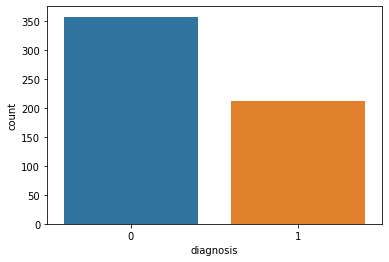

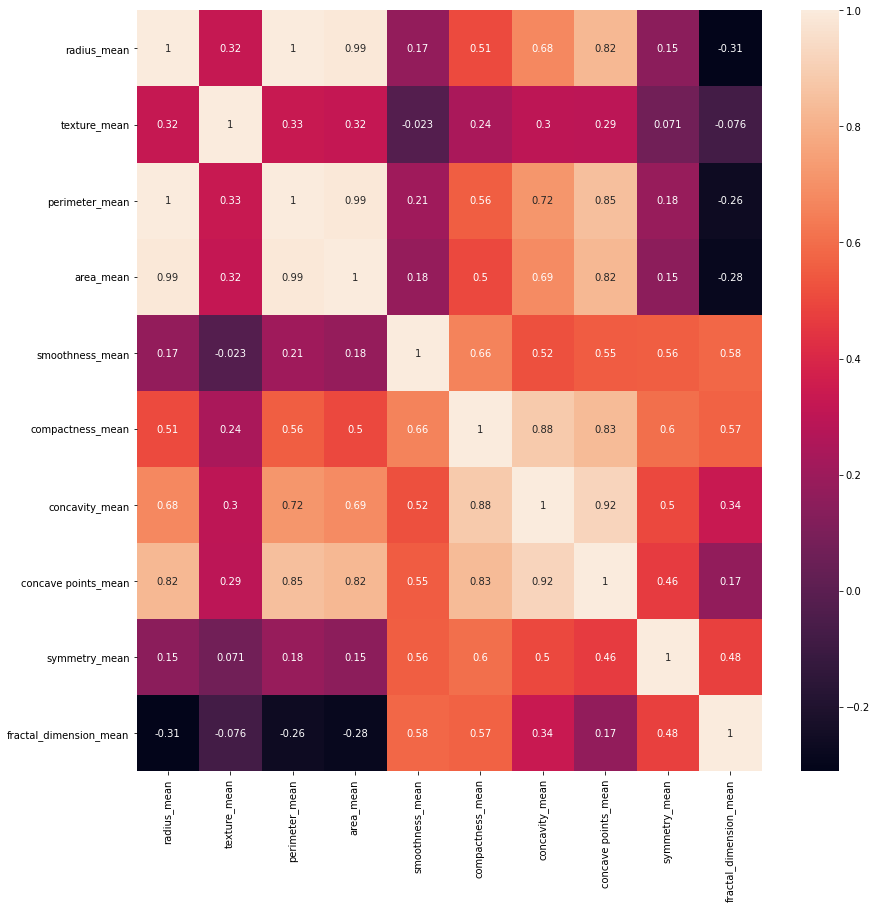

In [12]:
# 数据可视化
sns.countplot(df['diagnosis'], label='Count')
plt.show()

# 热力图呈现feature_mean字段间的相关性
corr = df[features_mean].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

In [13]:
# 特征选择
featurs_remian = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean']

In [16]:
# 抽取30%的样本作为测试集
train, test = train_test_split(df, test_size=0.3)
# 特征抽取
train_X = train[featurs_remian]
train_Y = train['diagnosis']
test_X = train[featurs_remian]
test_Y = train['diagnosis']

In [17]:
# 数据均一化
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

In [19]:
# 模型训练
model = svm.SVC()

model.fit(train_X, train_Y)

predict = model.predict(test_X)

print(accuracy_score(test_Y, predict))

0.9547738693467337


# KNN - 手写数字识别

In [28]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


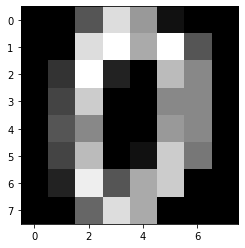

In [23]:
# 加载数据
digits = load_digits()
data = digits.data

# 探索数据
print(data.shape)

# 查看第一幅图像
print(digits.images[0])

# 第一幅图像代表的数字含义
print(digits.target[0])

# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [25]:
# 分割数据，将25%的数据作为测试集，其余作为训练集（你也可以指定其他比例的数据作为训练集）
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [27]:
# 创建KNN分类器
knn = KNeighborsClassifier() 

knn.fit(train_ss_x, train_y) 

predict_y = knn.predict(test_ss_x) 

print("KNN准确率: %.4lf" % accuracy_score(test_y, predict_y))

KNN准确率: 0.9756


In [30]:
# 创建SVM分类器
svm = svm.SVC()
svm.fit(train_ss_x, train_y)
predict_y=svm.predict(test_ss_x)
print('SVM准确率: %0.4lf' % accuracy_score(test_y, predict_y))

# 采用Min-Max规范化
mm = MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % accuracy_score(test_y, predict_y))

# 创建CART决策树分类器
dtc = DecisionTreeClassifier()
dtc.fit(train_mm_x, train_y) 
predict_y = dtc.predict(test_mm_x) 
print("CART决策树准确率: %.4lf" % accuracy_score(test_y, predict_y))

SVM准确率: 0.9867
多项式朴素贝叶斯准确率: 0.8844
CART决策树准确率: 0.8600


# EM聚类 - 王者荣耀英雄数据

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

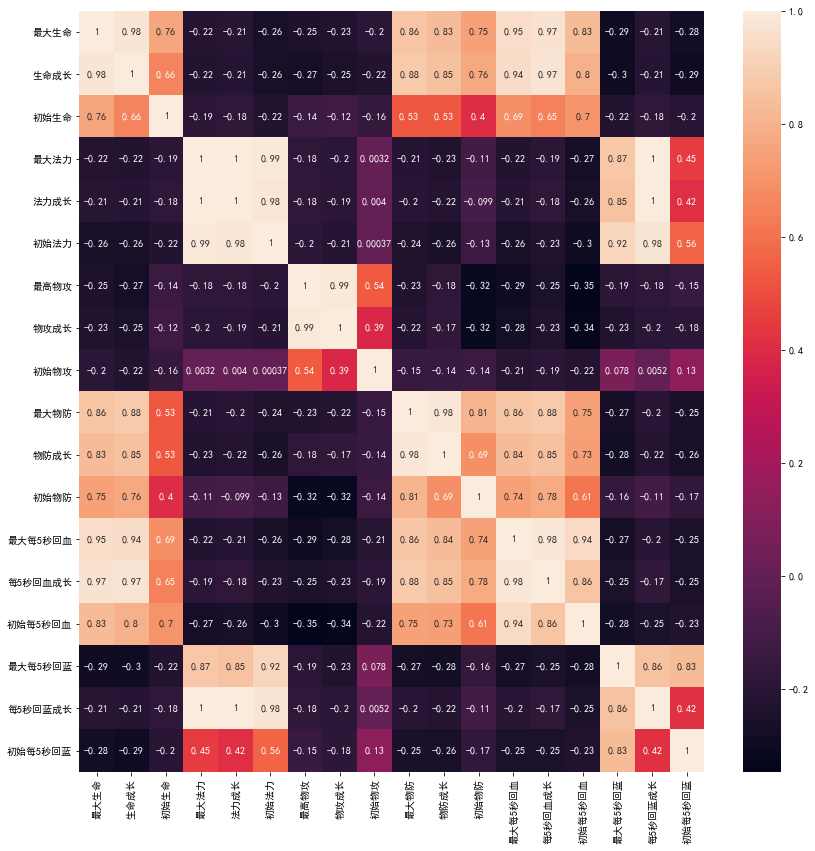

In [25]:
# 加载数据
data = pd.read_csv('./EM_data-master/heros.csv', encoding='gbk')

# 抽取可数值化的特征
features = list(data.columns[1:-2])
data_features = data[features]

# 用热力图呈现各特征之间的相关性
corr = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)
plt.show()

In [34]:
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = ['最大生命', '初始生命', '最大法力', '最高物攻', '初始物攻', '最大物防', '初始物防', '最大每5秒回血', '最大每5秒回蓝', '初始每5秒回蓝', '最大攻速', '攻击范围']
data_remian = data[features_remain]

pd.set_option('mode.chained_assignment', None)
data_remian['最大攻速'] = data_remian['最大攻速'].apply(lambda x: float(x.strip('%')))
data_remian['攻击范围'] = data_remian['攻击范围'].map({'远程':1, '近战':0})

# 采用Z-Score规范化数据
ss = StandardScaler()
data_remian = ss.fit_transform(data_remian)

# 构造高斯聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')
gmm.fit(data_remian)

# 训练数据
predict = gmm.predict(data_remian)
print(predict)

[ 1 29  8 16 12 12 18  8  4 23 11 23 16  6 20 11 25  4  3  7 13  7  0  7
  7  7  0 17  2 27  6  2 10  2 27  2  2  5 15 10 10  2  2 10  2 10 23 15
 23  2 26 14  3 22 22  1  9 29 24 12  9  3 19  1 21 14 14 28 17]


# AdaBoost - boston房价预测

In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [5]:
# 加载数据
data = load_boston()

# 分割数据
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, test_size=0.3, random_state=33)

# 使用AdaBoost回归模型
re = AdaBoostRegressor()
re.fit(train_x, train_y)
pred_y = re.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print("房价预测结果 ", pred_y)
print("均方误差 = ",round(mse,2))

房价预测结果  [19.82325581 10.38627451 12.66875    17.49166667 23.181875   21.68
 33.06904762 18.14328358 32.31111111 19.82       29.35531915 33.86235294
 11.0254902  24.13603604 13.81573034 24.28014706 17.70648649 17.4375
 28.88441558 23.181875   17.92087912 18.04186047 17.99583333 19.1
 33.06904762 18.00449438 21.562249   24.28014706 11.0254902  32.31111111
 17.87388889 26.16923077 10.38627451 21.21794872 25.87075472 33.10375
 25.87075472 10.90422535 13.97567568 24.28014706 16.24242424 12.12142857
 29.35531915 17.87388889 26.09141631 18.64708995 17.87388889 19.12727273
 26.83726708 19.12727273 17.49166667 33.86235294 17.46153846 17.49166667
 24.51702128 20.60789474 24.28014706 17.7        23.181875   21.78846154
 18.22356688 17.49166667 44.72777778 21.562249   17.7        26.16923077
 25.41516854 10.90422535 17.94864865 28.88441558 21.86666667 18.14565217
 17.87388889 27.48367347 19.32574257 45.78       17.33636364 10.90422535
 17.87388889 24.13603604 19.82325581 15.05       12.24       25